<a href="https://colab.research.google.com/github/DustyDaisy/ABReactChatGPTChatbot/blob/main/Introduction_to_SpeechBrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

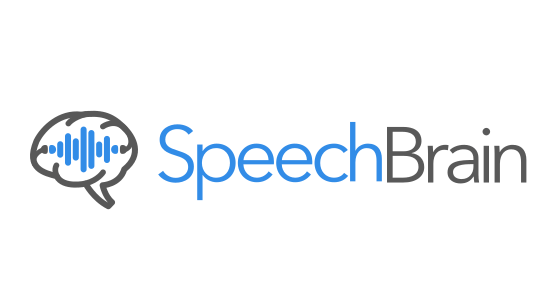

# **Introduction to SpeechBrain**

SpeechBrain is an **open-source** **all-in-one** speech toolkit based on **PyTorch**. It is designed to make the research and development of speech technology easier.

## **Motivation**
There are many speech and audio processing tasks of great practical and scientific interest.  

In the past, the dominant approach was to develop a **different toolkit for each different task**. Nevertheless, learning several toolkits is **time-demanding**, might require knowledge of **different programming languages**,  and forces you to familiarize yourself with  **different code styles and standards** (e.g., data readers).

Nowadays, most of these tasks can be implemented with the same **deep learning**  technology.
We thus explicitly designed SpeechBrain to natively support **multiple speech processing tasks**. We think that this might make much easier the life of speech developers. Moreover, we think that the combination of different speech technologies in single **end-to-end** and **fully differential system** will be crucial in the development of future speech technologies.

We did our best to design a toolkit which is:
*   *Easy to use*
*   *Easy to customize*
*  *Flexible*
* *Modular*
* *Well-documented*

## **Supported Technology**

You can thus use speechbrain to convert *speech-to-text*, to perform authentication using `speaker verification`, to enhance the quality of the speech signal, to combine the information from multiple microphones, and for many other things.

More precisely, SpeechBrain currently supports the following technologies:

*   *Speech Recognition*
*   *Speaker Recognition and Diarization*
*   *Speech Enhancement and Separation*
*   *Multi-microphone signal processing*
*   *End-to-end Spoken Language Understanding*
*    *Language models*


For all these tasks, we propose recipes on popular datasets that achieve **competitive** or state-of-the-art **performance**.

SpeechBrain is an ongoing project (still in beta version) and we are building a large community to further expand the current functionalities.

## **Installation**

There are essentially two ways to install SpeechBrain:
*  **Local installation**: it is suggested if you want to modify the toolkit or train a full speech processing system from scratch.

*  **Install via PyPI**: it is suggested when you wanna just use some core functionality of SpeechBrain in your project.

**Note:** SpeechBrain expects a python version >=3.7. However, it also works with the python 3.6 available in Colab.


### Local Installation (Git clone)

In [ ]:
%%capture
# Local installation
!git clone https://github.com/speechbrain/speechbrain/
%cd /content/speechbrain/
!pip install -r requirements.txt
!pip install -e .

In [ ]:
import speechbrain as sb

### PyPI Installation


In [ ]:
%%capture
!pip install speechbrain

Once installed, you should be able to import the speechbrain project with python:

## **Running an Experiment**


To run an experiment with SpeechBrain, the typical syntax is:

```
python train.py hparams.yaml
```

All the hyperparameters are summarized in a yaml file, while the main script for training is `train.py`.

For instance, let's run one of the minimal examples made available with SpeechBrain:

In [ ]:
%cd /content/speechbrain/tests/integration/ASR_CTC/
!python example_asr_ctc_experiment.py hyperparams.yaml

/content/speechbrain/tests/integration/ASR_CTC
100% 8/8 [00:03<00:00,  2.18it/s, train_loss=12.2]
100% 2/2 [00:00<00:00,  7.44it/s]
Epoch 0 complete
Train loss: 12.23
Stage.VALID loss: 4.75
Stage.VALID PER: 92.73
100% 8/8 [00:03<00:00,  2.24it/s, train_loss=7.22]
100% 2/2 [00:00<00:00,  7.93it/s]
Epoch 1 complete
Train loss: 7.22
Stage.VALID loss: 4.39
Stage.VALID PER: 96.36
100% 8/8 [00:03<00:00,  2.54it/s, train_loss=5.01]
100% 2/2 [00:00<00:00,  9.65it/s]
Epoch 2 complete
Train loss: 5.01
Stage.VALID loss: 4.48
Stage.VALID PER: 92.73
100% 8/8 [00:02<00:00,  3.31it/s, train_loss=3.86]
100% 2/2 [00:00<00:00, 10.09it/s]
Epoch 3 complete
Train loss: 3.86
Stage.VALID loss: 4.34
Stage.VALID PER: 92.73
100% 8/8 [00:02<00:00,  3.32it/s, train_loss=3.38]
100% 2/2 [00:00<00:00, 10.67it/s]
Epoch 4 complete
Train loss: 3.38
Stage.VALID loss: 4.59
Stage.VALID PER: 92.73
100% 8/8 [00:02<00:00,  3.38it/s, train_loss=3.09]
100% 2/2 [00:00<00:00, 10.79it/s]
Epoch 5 complete
Train loss: 3.09
Stage.VA

In this case,  we trained a CTC-based **speech recognizer** with a tiny dataset stored in the folder `samples`. As you can see, the training loss is very small, which indicates that the model is implemented correctly.
The validation loss, instead, is high. This happens because, as expected, the dataset is too small to allow the network to generalize.

For a more detailed description of the minimal examples, please see the tutorial on "minimal examples step-by-step".

All the results of the experiments are stored in the `output_folder` defined in the yaml file. Here, you can find, the checkpoints, the trained models, a file summarizing the performance, and a logger. For all the recipe currently
 supported, you can find our results here:

https://drive.google.com/drive/folders/1ZVuROxR711Xib2MsJbcPla4PWqbK1Ddw?usp=sharing

This way, you can compare your performance with the one achieved by us and you can have access to all the pre-trained models.


## **Hyperparameter specification with YAML**
Machine learning systems often require the specification of several hyperparameters. In SpeechBrain, we do it with YAML. YAML allows us to specify the hyperparameters in an elegant,  flexible,  and transparent way.

Let's see for instance this yaml snippet:


```yaml
dropout: 0.8
compute_features: !new:speechbrain.lobes.features.MFCC
    n_mels: 40
    left_frames: 5
    right_frames: 5

model: !new:speechbrain.lobes.models.CRDNN.CRDNN
   input_shape: [null, null, 440]
   activation: !name:torch.nn.LeakyReLU []
   dropout:  !ref <dropout>
   cnn_blocks: 2
   cnn_channels: (32, 16)
   cnn_kernelsize: (3, 3)
   time_pooling: True
   rnn_layers: 2
   rnn_neurons: 512
   rnn_bidirectional: True
   dnn_blocks: 2
   dnn_neurons: 1024
```

As you can see, this is not just a plain list of hyperparameters. For each parameter, we specify the class (or function) that is going to use it. This makes the code **more transparent** and **easier to debug**.

The YAML file contains all the information to initialize the classes when loading them. In SpeechBrain we load it with a special function called `load_hyperpyyaml`, which initializes for us all the declared classes. This makes the code extremely **readable** and **compact**.

Our hyperpyyaml is an extension of the standard YAML. For an overview of all the supported functionalities, please take a look at the [YAML tutorial](https://colab.research.google.com/drive/1Pg9by4b6-8QD2iC0U7Ic3Vxq4GEwEdDz?usp=sharing).

Note that all the hyperparameters can be overridden from the command line. For instance, to change the dropout factor:

`python experiment.py params.yaml --dropout=0.5 `



## **Experiment File**
The experiment file (e.g., `example_asr_ctc_experiment.py` in the example) trains a model by **combining** the functions or **classes declared in the yaml file**. This script defines the data processing pipeline and defines all the computations from the input signal to the final cost function. Everything is designed to be** easy to customize**.


### Data Specification
The user should prepare a data specification file (in **CSV** or JSON) format that reports all the data and the labels to process.

For instance, in the minimal example ran before, the data specification file is this:


```csv
ID, duration, wav, wav_format, wav_opts, spk_id, spk_id_format, spk_id_opts, ali, ali_format, ali_opts, phn, phn_format, phn_opts,char,char_format,char_opts
spk1_snt5,2.6,$data_folder/spk1_snt5.wav, wav, ,spk1,string, ,$data_folder/spk1_snt5.pkl,pkl, ,s ah n vcl d ey ih z dh ax vcl b eh s cl t cl p aa r dx ax v dh ax w iy cl,string, ,s u n d a y i s t h e b e s t p a r t o f t h e w e e k,string,
spk2_snt5,1.98,$data_folder/spk2_snt5.wav, wav, ,spk2,string, ,$data_folder/spk2_snt5.pkl,pkl, ,vcl jh ah m cl p dh ax f eh n s ae n hh er iy ah cl p dh ax vcl b ae ng cl,string, ,k e n p a I r s l a c k f u l l f l a v o r,string,
```

You can open this file with a CSV reader for better rendering. For each row, you have an example with the corresponding paths to wav signal and labels.

As an alternative, users can specify the data in a **JSON** format:


```json
{
    "spk1_snt5": {
        "wav": "{data_root}/spk1_snt5.wav",
        "length": 2.6,
        "spk_id": "spk1",
        "ali": "{data_root}/spk1_snt5.pkl",
        "phn": "s ah n vcl d ey ih z dh ax vcl b eh s cl t cl p aa r dx ax v dh ax w iy cl",
        "char": "s u n d a y i s t h e b e s t p a r t o f t h e w e e k"
    },
    "spk2_snt5": {
        "wav": "{data_root}/spk2_snt5.wav",
        "length": 1.98,
        "spk_id": "spk2",
        "ali": "{data_root}/spk2_snt5.pkl",
        "phn": "vcl jh ah m cl p dh ax f eh n s ae n hh er iy ah cl p dh ax vcl b ae ng cl",
        "char": "k e n p a i r s l a c k f u l l f l a v o r"
    }
}
```

JSON is less compact than CSV but more flexible. For many applications, using the CSV file is enough. For more complex tasks (e.g, speaker diarization, speaker diarization + recognition), however, people might take advantage of the hierarchical structure offered by JSON.

All datasets are formatted differently. In general, the users have to write a **data preparation** script that parses the target dataset and creates the data specification files. For all the proposed recipes, however, we also release the corresponding data preparation library.

### Data processing pipeline
Thanks to our Dynamic datasets, the data reading pipeline is fully customizable in the experiment file directly. For instance, in the minimal example, you can define the following intuitive function to read the audio file


```python
    # 2. Define audio pipeline:
    @sb.utils.data_pipeline.takes("wav")
    @sb.utils.data_pipeline.provides("sig")
    def audio_pipeline(wav):
        sig = sb.dataio.dataio.read_audio(wav)
        return sig
```

The function takes in input the wav path and returns a signal read with the specified reader. In the variable `batch.sig` (see `example_asr_ctc_experiment.py`) you will have your batches of signals ready to be used. Note that here you can add any kind of processing (e.g, adding noise, speech change, dynamic mixing, etc) just by coding with the desired pipeline.

A similar function should be written for all the entries that our script is supposed to process. The minimal example, for instance, reads a sequence of phoneme labels as well:


```python
    @sb.utils.data_pipeline.takes("phn")
    @sb.utils.data_pipeline.provides("phn_list", "phn_encoded")
    def text_pipeline(phn):
        phn_list = phn.strip().split()
        yield phn_list
        phn_encoded = label_encoder.encode_sequence_torch(phn_list)
        yield phn_encoded

```
Here, we read the phoneme list, separate each entry by space, and convert the list of phonemes to their corresponding indexes (using the label_encoder described [in this tutorial](https://colab.research.google.com/drive/1AiVJZhZKwEI4nFGANKXEe-ffZFfvXKwH?usp=sharing)).

As you can see, we directly expose in the main script the data reading pipeline because this adds a lot of transparency and flexibility.

### Custom forward and cost computation methods
The other thing that users often want to customize is the sequence of computations that go from the input to the final cost function. In the experiment file, users are required to specify them in the `forward` and `compute_objectives` methods.
In the minimal example, the forward method is defined as follows:


```python
    def compute_forward(self, batch, stage):
        "Given an input batch it computes the output probabilities."
        wavs, lens = batch.sig
        feats = self.hparams.compute_features(wavs)
        feats = self.modules.mean_var_norm(feats, lens)
        x = self.modules.model(feats)
        x = self.modules.lin(x)
        outputs = self.hparams.softmax(x)
```

The input is the variable batch that contains all the entries specified in the data loader (e.g, we have `batch.sig` and `batch.phn_encoded`). As you can see, we compute the features, we perform a mean and variance normalization, and we call the model. Finally, a linear transformation + softmax is applied.

The compute objective function looks like this:

```python
    def compute_objectives(self, predictions, batch, stage):
        "Given the network predictions and targets computed the CTC loss."
        predictions, lens = predictions
        phns, phn_lens = batch.phn_encoded
        loss = self.hparams.compute_cost(predictions, phns, lens, phn_lens)

        if stage != sb.Stage.TRAIN:
            seq = sb.decoders.ctc_greedy_decode(
                predictions, lens, blank_id=self.hparams.blank_index
            )
            self.per_metrics.append(batch.id, seq, phns, target_len=phn_lens)

        return loss
```
We take the predictions done in the forward step and compute a cost function using the encoded labels in batch.phn_encoded. During validation/test, we also perform actual decoding on the speech sequence (in this case using a greedy decoder and, in a more general case, using beam search) to monitor the performance.

### Brain Class
To make training easier, we implemented a simple trainer called **Brain class**. The Brain class defines a set of customizable routines that implement all the steps needed in standard **training and validation loops**. After defining the data pipeline, the forward, the compute objective, and other custom methods, you can call the fit method of the brain class for training (and the eval one for the test):

```python
    # Trainer initialization
    ctc_brain = CTCBrain(hparams["modules"], hparams["opt_class"], hparams)

    # Training/validation loop
    ctc_brain.fit(
        range(hparams["N_epochs"]),
        train_data,
        valid_data,
        train_loader_kwargs=hparams["dataloader_options"],
        valid_loader_kwargs=hparams["dataloader_options"],
    )
    # Evaluation is run separately (now just evaluating on valid data)
    ctc_brain.evaluate(valid_data)
```
For a more detailed description, take a look at the [Brain class tutorial here](https://colab.research.google.com/drive/1fdqTk4CTXNcrcSVFvaOKzRfLmj4fJfwa?usp=sharing).


## **Pretrain and use**
Sometimes you might only want to use a pre-trained model rather than training it from scratch. For instance, you might want to transcribe an audio file, compute speaker embeddings, apply a voice activity detector, and doing many other operations in your scripts. To make this easier, we uploaded several models in [HuggingFace](https://huggingface.co/speechbrain/). The models uses inference classes to make inference easier. For instance, to transcribe an audio file with a model trained with librispeech you can simply do:


In [ ]:
from speechbrain.pretrained import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-rnnlm-librispeech", savedir="pretrained_models/asr-crdnn-rnnlm-librispeech")
asr_model.transcribe_file('speechbrain/asr-crdnn-rnnlm-librispeech/example.wav')

'THE BIRCH CANOE SLID ON THE SMOOTH PLANKS'

As you can see, in this case there is a matching between the text uttered by the speaker and the content of the audio file.
We have similar functions for speaker recognition, speech separation, enhancement.

## **Folder Organization**
The main folder is organized in this way:

*   **SpeechBrain** contains the main libraries of SpeechBrain. You can find here the core.py that implements core functionalities such as the Brain class. You also find here libraries for data loading, decoders, neural networks, signal processing, and many others. Under the folder lobe, you can find combinations of basic functionalities that we think are useful for speech and audio processing. For instance, you can find here the implementation of features like FBANKs and MFCCs, the data augmentation functions, as well as some popular neural networks used a lot in the recipes.
*   **Recipes** contains training scripts for several speech datasets. For instance, you can find recipes for *LibriSpeech*, *TIMIT*, *VoxCeleb*, *VoiceBank*, and many others.
*   **Samples** is a tiny speech dataset used for training minimal examples and to perform debug tests.
*   **Test** is a collection of unit and integration tests that we use for debugging and continuous integration.

## **Tensor Format**
All the tensors within SpeechBrain are formatted using the following convention:

`tensor=(batch, time_steps, channels[optional])`

The batch is always the first element, and time steps are always the second one. The remaining dimensions are channels, which are options and there might be as many as you need).

Let's now some examples. For instance, let's try to compute the FBANKS of an input signal:

In [ ]:
import torch
from speechbrain.lobes.features import Fbank

signal = torch.rand([4, 16000]) # [batch, time]
print(signal.shape)

fbank_maker = Fbank()
fbanks = fbank_maker(signal) # [batch, time, features]
print(fbanks.shape)

torch.Size([4, 16000])
torch.Size([4, 101, 40])


The `Fbank` function expects in input a signal formatted as `[batch, time]`. It returns the features in the format `[batch, time, features]`.

Let's now try to compute the STFT of any audio signal:

In [ ]:
import torch
from speechbrain.dataio.dataio import read_audio
from speechbrain.processing.features import STFT

signal = torch.rand([4, 1600]) # [batch, time]
print(signal.shape)

compute_STFT = STFT(sample_rate=16000, win_length=25, hop_length=10, n_fft=400)
signal_STFT = compute_STFT(signal) #[batch, time, channel1, channel2]
print(signal_STFT.shape)

torch.Size([4, 1600])
torch.Size([4, 11, 201, 2])


The output here is `[batch, time, channel1, channel2]`, where  `channel1` is the feature axis and `channel2` is the real and imaginary part.

**Why do we need a tensor format?**
Defining a tensor format makes model combination easier. Many formats are possible. For SpeechBrain, we selected this one because it is commonly used in recurrent neural networks.

In SpeechBrain, the basic building blocks of the neural networks (e.g, *RNN*, *CNN*, *normalization*, *pooling*, ...) are designed to support the same tensor format and can thus be combined smoothly.

To convince you about that, let's try to combine a CNN and an RNN using SpeechBrain:

In [ ]:
from speechbrain.nnet.CNN import Conv1d
from  speechbrain.nnet.RNN import LSTM

inp_tensor = torch.rand([10, 15, 40])
print(inp_tensor.shape)

# CNN
CNN = Conv1d(input_shape=inp_tensor.shape, out_channels=8, kernel_size=5)
cnn_out = CNN(inp_tensor)
print(cnn_out.shape)


# RNN
RNN = LSTM(input_shape=cnn_out.shape, hidden_size=256, num_layers=1)
rnn_out, _ = RNN(cnn_out)
print(rnn_out.shape)

torch.Size([10, 15, 40])
torch.Size([10, 15, 8])
torch.Size([10, 15, 256])


The combination is done without any tensor reshaping (e.g, we don't have to transpose, squeeze, unsqueeze). The basic nnet functions are a wrapper of the original pytorch functions.  The difference is that er manage for you all the annoying tensor reshaping operations. This makes the code cleaner and easier to follow.
Let's try to do the same operation with raw PyTorch:

In [ ]:
import torch

inp_tensor = torch.rand([10, 15, 40])
print(inp_tensor.shape)

# CNN
CNN = torch.nn.Conv1d(in_channels=40, out_channels=8, kernel_size=5)
inp_tensor_tr = inp_tensor.transpose(1,2) # requres (N,C,L)
cnn_out_tr = CNN(inp_tensor_tr)
print(cnn_out_tr.shape)

# RNN
cnn_out_tr2 = cnn_out_tr.transpose(1,2)
RNN = torch.nn.LSTM(input_size=8, hidden_size=256, num_layers=1)
rnn_out, _ = RNN(cnn_out_tr2)
print(rnn_out.shape)


torch.Size([10, 15, 40])
torch.Size([10, 8, 11])
torch.Size([10, 11, 256])


The raw pytorch approach requires two transpose operations because of the different tensor formats used in CNN and RNN modules. In SpeechBrain, this is managed internally and users do not have to worry about it.

# **About SpeechBrain**
- Website: https://speechbrain.github.io/
- Code: https://github.com/speechbrain/speechbrain/
- HuggingFace: https://huggingface.co/speechbrain/


# **Citing SpeechBrain**
Please, cite SpeechBrain if you use it for your research or business.

```bibtex
@misc{speechbrain,
  title={SpeechBrain: A General-Purpose Speech Toolkit},
  author={Mirco Ravanelli and Titouan Parcollet and Peter Plantinga and Aku Rouhe and Samuele Cornell and Loren Lugosch and Cem Subakan and Nauman Dawalatabad and Abdelwahab Heba and Jianyuan Zhong and Ju-Chieh Chou and Sung-Lin Yeh and Szu-Wei Fu and Chien-Feng Liao and Elena Rastorgueva and François Grondin and William Aris and Hwidong Na and Yan Gao and Renato De Mori and Yoshua Bengio},
  year={2021},
  eprint={2106.04624},
  archivePrefix={arXiv},
  primaryClass={eess.AS}
}
```

# **About SpeechBrain**
- Website: https://speechbrain.github.io/
- Code: https://github.com/speechbrain/speechbrain/
- HuggingFace: https://huggingface.co/speechbrain/


# **Citing SpeechBrain**
Please, cite SpeechBrain if you use it for your research or business.

```bibtex
@misc{speechbrain,
  title={{SpeechBrain}: A General-Purpose Speech Toolkit},
  author={Mirco Ravanelli and Titouan Parcollet and Peter Plantinga and Aku Rouhe and Samuele Cornell and Loren Lugosch and Cem Subakan and Nauman Dawalatabad and Abdelwahab Heba and Jianyuan Zhong and Ju-Chieh Chou and Sung-Lin Yeh and Szu-Wei Fu and Chien-Feng Liao and Elena Rastorgueva and François Grondin and William Aris and Hwidong Na and Yan Gao and Renato De Mori and Yoshua Bengio},
  year={2021},
  eprint={2106.04624},
  archivePrefix={arXiv},
  primaryClass={eess.AS},
  note={arXiv:2106.04624}
}
```